# Declaration of Originality

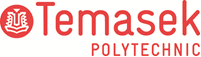

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Melissa Kuah 2404487G
* Tutorial Group                : P01
* Tutor						    : Mr Ruchir SRIVASTAVA
* Submission Date               : 11 February 2026 0900

**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# 1. Project Summary 

**Business Problem:** 

In real-world scenarios, it is often that Banks already identify wealthy customers & long-term customers (customers of higher-value, who demonstrate LOYALTY) and often have dedicated relationship managers (RMs) assigned to manage these relationships with these distinguished customers. However, being a wealthy or long-term customer may not necessarily mean wanting a term deposit.

**Potential Scenario**: A Relationship Manager may have 500 priority customers to manage. BUT potential limitations:

1. They can only call a limited number of customers per day (DEPENDING ON THEIR WORKING SPEED) since manpower is low and they are just one person
2. Furthermore, **based on my analysis done in this jupyter notebook**, only around 11% of customers actually want term deposits. (which is target variable = yes)
3. Therefore, calling each customer individually wastes time on **uninterested customers**, lose situation as it reduces productivity.

**The Challenge:** Among the bank's customer base, **WHO** actually **wants** a term deposit?

**Solution:** I designed a Streamlit web application which is powered by a trained ML classification model to predict whether a customer is **likely to subscribe** to a term deposit **BEFORE the call is made**. This is beneficial for relationship managers since they are able to identify **HIGH-PROBABILITY CUSTOMERS** and **prioritise their time and resources carefully** rather than calling randomly. 

**The ML classification model predicts using:**

1. Demographic features (age, job, marital status, education)
2. Financial features (credit default, housing loan, personal loan)
3. Campaign history (contact type, month, day of week, previous contacts, previous outcome)
4. Economic indicators (employment variation rate, consumer price index, consumer confidence index, euribor 3-month rate, number of employees)
5. 5 engineered features (age group, contacted before, previous success, economic condition, contact recency)
4. **DROPPED duration & campaign** to prevent data leakage (elaboration below)

**Key Results:**

1. Best Model Identified after training: Random Forest with tuned hyperparameters
2. F1-Score: 48.58% 
3. Recall: 52.37% 
4. Subscribers Found: 729 out of 1,392 potential subscribers 
5. Business Impact: Finds more potential subscribers identified per campaign after tuning

# 2. Background/Context: Term Deposits in Banking 

**What is a term deposit ?** 

A term deposit (also known as a Fixed Deposit) is when a customer locks their money in the bank for a fixed period (e.g.6, 12, 24 months) in exchange for a higher interest rate.

**Why Banks Actively Promote Term Deposits ?**

1. **Guaranteed Funds**: Unlike savings accounts where customers can withdraw anytime, term deposits give banks **guaranteed access to funds** for a **fixed period**.
2. **Profit Margin**: Banks pay customers interest on term deposits at a lower rate, but they can lend that money to the borrower at a higher rate. The difference in the interest then makes the bank profit.
3. **Business Stability**: Predictable funds can help banks plan their lending and investments better.

**Why Customers Subscribe ?**

1. **Higher Interest**: It is because **term deposits** offer **significantly better returns** than **basic savings accounts**. 
2. **Safe Investment**: This is because customers are insured up to $100,000 under SDIC in Singapore.
   Link of source findings: https://www.straitstimes.com/business what-does-hike-in-insurance-coverage-on-bank-deposits-to-100000-mean-for-you
3. **Discipline**: This is because the money is locked in (fixed deposit), which is beneficial for preventing impulsive spending.
4. **Guaranteed Returns**: Instead of just not making use of the money, you can put in fixed deposit and banks guarantee higher returns based on interest.

**When Do Banks Actually Call Customers?**

**Phone Calls Are Still Used In Banking!**

While digital marketing is more common today, banks **still use phone calls** for **high-value scenarios**:

1. **Priority Banking**: RMs call wealthy clients to **discuss financial plans** and **build relationships** with customers
2. **Term Deposit Maturity Renewals**: Banks call customers when their Fixed Deposit is **maturing** to ask if they want to **renew**.
3. **Follow-ups**: A customer had previously **showed interest online or in-branch**, and the bank calls to follow up.

Despite different countries, the core problem still remains the same: RMs have **limited time**, and **not every customer they call will be interested**.

**Singapore Context: The Scam Problem**

Link of Reference: https://www.straitstimes.com/singapore/fixed-deposit-scam-boasting-high-interest-rates-claims-12-victims-losses-amounting-650000

In Singapore, there have been news articles of scam calls impersonating banks which is a **growing concern**. Scammers will frequently pose as bank representatives, asking people to sign up for financial products like term deposits. 

This has therefore made Singaporeans increasingly wary of unsolicited and sudden bank calls, despite some being genuine.

All in all, this makes consent-based calling ever so necessary:

1. Customers who have not given consent are **far more likely** to dismiss or report the call as a potential scam.
2. Random calls to uninterested customers **wastes resources and manpower**.
3. RMs calling pre-qualified, high-probability customers who are open to discuss such financial products leads to **better conversations, relationships and a higher conversion**.

**Assumptions made in this project:**

1. I will assume that the customer base has **given consent** under **PDPA (Personal Data Protection Act)** in Singapore for the bank to contact them regarding financial products. This model is designed to help banks prioritise among **consenting** customers, not to enable **unsolicited outreach**.

OVERALL: BankConvert AI (Name of Application) helps RMs focus their **limited time** on customers who are **most likely to subscribe**, most importantly, within a framework of trust and consent.

# 3. Business Understanding

**Problem Statement:**

A Portuguese banking institution conducts direct marketing campaigns to **promote term deposit subscriptions**. The current approach involves **contacting customers via phone without prior qualification**, resulting in:

1. **Low conversion rate:** Only around 11% of contacted customers subscribe
2. **High operational costs:** Each call costs time and resources
3. **Customer fatigue:** Repeated unsuccessful contacts damage customer relationships as it's annoying to repeatedly receive calls that you are uninterested in. **(ESPECIALLY: In Singapore where scam-wary customers may view frequent calls negatively)**

**Business Objective:**

I aimed to develop a predictive model that identifies customers **most likely to subscribe to a term deposit**, enabling:

1. **Targeted marketing:** Focus resources on **high-probability customers**
2. **Cost reduction:** Reduce wasted calls on **low-probability prospects**
3. **Improved ROI:** Increase conversion rates while reducing campaign costs (via reduction in calling randomly)

**Feature Exclusions:**

**WHY NOT DURATION ?** Duration cannot be used. Although call duration has a **strong correlation with the target variable**, it represents **data leakage** and **contributes to inaccurate prediction**. This is because call duration is **only known AFTER the call ends**, but the model needs to predict **BEFORE !!** making the call, since we want to predict b4 to seeve out the people who will subscribe to the term deposit and **not waste time and resources**.

**WHY NOT CAMPAIGN?** Campaign cannot be used as well since Campaign represents the number of times the bank called the customer **during** this marketing campaign. However, this is only known **AFTER** the calls are made. But since the goal is to **predict BEFORE making any calls** to **identify high-probability customers**, using campaign would **defeat the entire purpose** and **resources would have already been wasted** by calling the customer multiple times before making the prediction.

**Why F1-Score Instead of Accuracy?**

With around 89% of customers **NOT** subscribing, **accuracy is misleading**. This is because a model predicting all "no" achieves 89% accuracy but it catches 0 actual subscribers, leading to an **inaccurate analysis**. F1-Score balances:

1. **Precision:** Avoiding wasted calls on non-subscribers
2. **Recall:** Not missing potential subscribers

**ML Concepts Demonstrated:**
1. **One-Hot Encoding** - Applied to categorical features 
2. **Binary Target Encoding** - Target variable transformation (yes/no → 1/0)
3. **StandardScaler** - Numerical feature normalisation since features have different scales
4. **Feature Engineering** - 5 new features created from current dataset
5. **Model Comparison** - 4 algorithms compared to find best performing model
6. **Hyperparameter Tuning** - RandomizedSearchCV with 5-fold cross-validation
7. **F1-Score Evaluation** - Primary metric for imbalanced classification
8. **Class Imbalance Handling** - class_weight='balanced' to improve recall

**Business Impact (when finding more potential subscribers per campaign):**

1. **Direct Revenue:**
   - This is because each term deposit subscription earns the bank **profit**, leading to bigger earnings

2. **Customer Lifetime Value:**
   - Customers who subscribe may build trust in bank 
   - More trust in bank => Likely to stay and **potentially invest more** in bank

3. **Marketing Efficiency:**
   - Same marketing budget, but finding MORE of the **right** customers
   - Can focus on **high-probability customers** and **allocate resources** accordingly

# 4. Dataset Overview & Relevance 

**Dataset:** UCI Bank Marketing Dataset
**Source:** https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
**Records:** 41,188 customer interactions from a Portuguese bank 
**Features:** 20 input features (10 categorical, 10 numerical) + 1 binary target
**Target Variable:** yes/no = Did customer subscribe to term deposit ? 

**Dataset Relevance: Why Portuguese Data Applies Globally, and INCLUDING SINGAPORE**

**Non-Technical Reasoning:**

1. **The prediction target is universal:** "Will customer subscribe to term deposit?"
   - This question is relevant regardless of location around the globe, whether you are at a Portuguese bank or at DBS, OCBC, or UOB in Singapore.

2. **Customer behavior patterns are universal:**
   - Features like age, job, education, financial status affect subscription likelihood everywhere. THESE ARE NOT PORTUGESE SPECIFIC TRAITS.

3. **The banking scenarios are the same:** Phone-based outreach for priority banking, term deposit renewals, and lead follow-ups happens in Singapore just as it does in Portugal.

4. **Term deposits exists globally:** Banks worldwide face the same telemarketing challenges of low conversion and high operational costs.

**Technical Reasoning:**

1. **Cross-Validation Ensures Generalization**
 - I used **5-fold cross-validation** during hyperparameter tuning **(K-fold Cross Validation)**, which means:
    - The model was **tested** on **5 different "unseen" data portions**
    - From there, model had **consistent scores across all 5 folds with a low standard deviation** which proves that the model had learnt **general patterns**
- Therefore, in conclusion, the model is **not overfitting** to the specific Portuguese data and can be used around in global markets.

2. **Feature Universality**
 - The features used (age, job type, education level, financial status, economic indicators) are **standard** and the norm variables globally. Furthermore, they are **not unique** to Portugal. 

**Conclusion**
In conclusion, the cross-validated model **captures general customer behaviour patterns** that can be **transferred** across banking contexts, making it applicable to **Singapore and other markets too**.

# Libraries

In [ ]:
## Import libraries


# 2. Data Understanding

## 2.1 Load dataset

In [ ]:
## Read *.csv file into pandas DataFrame


## 2.2 Summary Statistics

In [ ]:
## Understand the type of variable for each column


In [ ]:
## Check for missing data


In [ ]:
## Describe data distribution


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [ ]:
## Understanding distribution of target


### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection